# Midterm Exam (part 2) - Computational Physics 2

- When you finish this part, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- This part is open-book and individual. **It includes short application problems.**


- You can call your notebook with your surname, e.g. **name-midterm-p2.ipynb**, and also include your name on the notebook.


## Instructions:

- **Duration: 1 hour, 15 minutes max.**


- Within a single python notebook, solve the following problems using python code:

## Name:

Mateo Carpio & Andrés Villares 

### 10. (5 points) Initial-value problem: Free fall with a drag force

Consider an object with a mass of $0.4\,\rm kg$ that falls from rest under the influence of gravity (i.e., along the Y axis). The object is also subjected to a drag force that arises from friction with air molecules, so its equation of motion reads:

$$m\frac{d^2y}{dt^2}=-m\,g + b\frac{dy}{dt}$$

where $g = 9.8\,\rm m\,s^{-2}$ and $b = 3.3\times 10^{-2}\,\rm kg\,s^{-1}$. If the starting point of the object is $y(0) = 100\,\rm m$, its initial speed $\dot{y}(0) = 0$, and we are interested in studying its fall during the first $3\,\rm s$ of motion:


**10.1. (1 point)** Find the analytical solution for $y(t)$ using sympy.

10.1. (1 point) Find the analytical solution for  𝑦(𝑡)
  using sympy

In [21]:
from sympy import Function, dsolve, Eq, Derivative, symbols
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [10]:
# Constants
m = 0.4
g = 9.8
b = 3.3*10**-2

# Symbol variable t:
t = sp.symbols("t")

# Symbol for function y(x):
y = sp.symbols("y", cls=sp.Function)

In [11]:
# Differential equation:

diffeq = (sp.Eq(y(t).diff(t,2)*m,-m*g+b*y(t).diff(t)))

display(diffeq)

Eq(0.4*Derivative(y(t), (t, 2)), 0.033*Derivative(y(t), t) - 3.92)

In [12]:
# Now, we find the solution using the ics:

result = sp.dsolve(diffeq, ics = {y(0):100, y(t).diff(t).subs(t, 0): 0})

display(result)

Eq(y(t), 118.787878787879*t - 1439.85307621672*exp(0.0825*t) + 1539.85307621672)

**10.2. (1 point)** Make a plot ($y$ vs. $t$) of the analytical solution $y(t)$.



In [14]:
#Extract the solution

sln_t = lambda t: 118.788*t - 1439.853*np.exp(0.0825*t) + 1539.853


In [15]:
# Initial final values of T
t_00 = 0.
t_20 = 3.

# Spacing
h_1 = 0.1

# The axis 
t_axis = np.arange(t_00, t_20 + h_1, h_1)

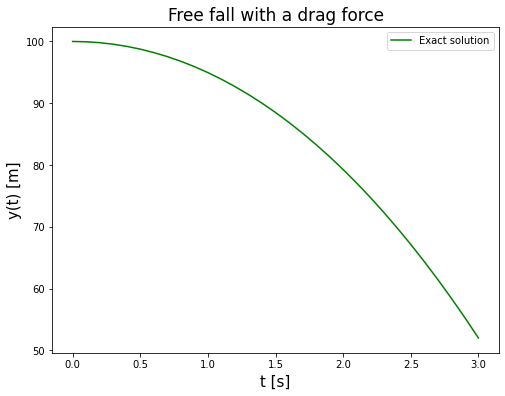

In [36]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_axis, sln_t(t_axis), "g", label = "Exact solution")

plt.xlabel('t [s]', size = 15)
plt.ylabel('y(t) [m]', size = 15)

plt.legend()
plt.title('Free fall with a drag force', size=17)
plt.show()

**10.3. (1 point)** Use scipy functions to find the numerical solution for $y(t)$ (choose a RK integrator).





In [22]:
#Array 

func = lambda x, s: np.dot(np.array([[0, 1], [0, + b/m]]), s) + np.array([0, -g]) 


In [23]:
#Solving using RK45

sol = solve_ivp(func, [0, 3], [100, 0], method='RK45', t_eval = t_axis)



**10.4. (1 point)** Make a plot ($y$ vs. $t$) of the numerical solution plus the analytical solution.




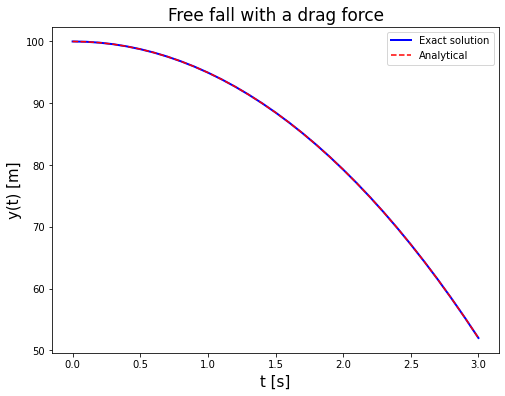

In [43]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_axis, sln_t(t_axis), "b", label = "Exact solution", linewidth = 2)
plt.plot(sol.t, sol.y[0], "r", linestyle = '--', label ="Analytical", linewidth = 1.5)

plt.xlabel('t [s]', size = 15)
plt.ylabel('y(t) [m]', size = 15)

plt.legend()
plt.title('Free fall with a drag force', size=17)

plt.show()

**10.5. (1 point)** Analyse convergence, i.e., compute and plot the $L_2$-norm errors versus different step sizes.


In [44]:
def solver(h):
    
    t_axis = np.arange(t_00, t_20 + h, h)
    
    sol = solve_ivp(func, [0, 3], [100, 0], method='RK45', t_eval = t_axis)
    
    return sol, t_axis

def L2_norm(h): 
    
    sol, t_axis = solver(h)
    
    sol_exact = sln_t(t_axis)
    
    norm = np.sqrt(np.sum(np.abs((sol_exact - sol.y[0]))**2)/len(t_axis))
    
    return norm




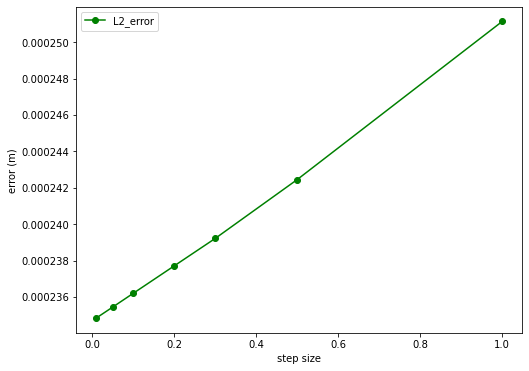

In [58]:
h_s = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5,  1]

norms = np.zeros(len(h_s))

for i in range(len(h_s)):
    
    norms[i] = L2_norm(h_s[i])
    

# Plotting

plt.figure(figsize = (8,6))

plt.plot(h_s, norms, "g", label = "L2_error", marker = 'o')

plt.xlabel('step size')
plt.ylabel('error (m)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

In [59]:
#The numerical values are of orde 10^{04}
norms

array([0.00023484, 0.00023544, 0.0002362 , 0.00023771, 0.00023921,
       0.00024245, 0.00025114])

### 11. (5 points) 2D Laplace equation: Electrostatic potential

We seek to find the electric potential for all the points inside a charge-free square with dimensions ($0.4\times 0.4 \,\rm m^2$). The top and sides of the region are made up of wires that are grounded (i.e. they are kept at $0\,\rm V$). The bottom wire is connected to a battery that keeps it at a constant $240\,\rm V$ (see figure below).

To find the potential, $V(x,y)$, we need to solve the 2D Laplace equation:

$$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$$


Reference image:

https://github.com/wbandabarragan/computational-physics-2/blob/main/exams/electrostatics.png

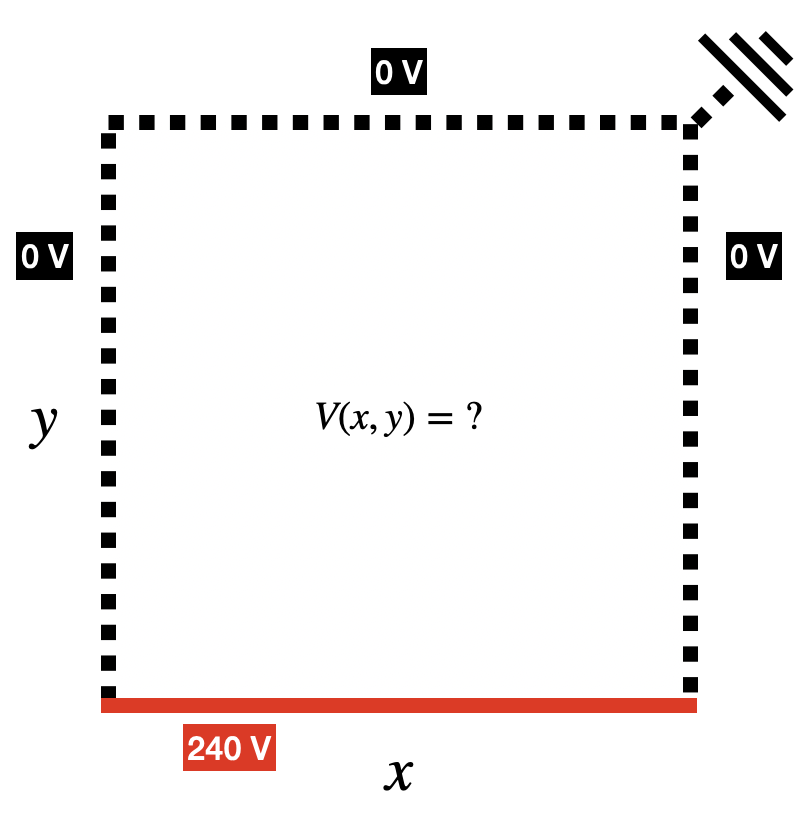

**11.1. (1 point)** Write down the finite difference approximation of the Laplace equation. Hint: Express the answer with $V_{i,j}$ on the left-hand side.


.

1)

$$V_{i, j} = \frac{(\Delta x^2(V_{i+1, j}+ V_{i-1, j}) + \Delta y^{2}(V_{i, j+1}+ V_{i, j-1}))}{2(\Delta x^2 + \Delta y^{2})}$$


**11.2. (1 point)** Create an empty matrix for $V(x,y)$ and add the boundary conditions of the problem to it. Hint: A matrix with $100\times 100$ cells would be sufficient.

In [82]:
# Limits:
a = 0.4 # for x 
b = 0.4  # for y

# Step sizes
Nx = 100
Ny = 100

dx = a/Nx 
dy = b/Ny

# Vectors
x = np.arange(0, a, dx)
y = np.arange(0, b, dy)

# Grid - computational domain

X, Y = np.meshgrid(x, y)

# Empty matrix for the numerical sln

V_numer = np.zeros((Ny, Nx))


# Boundary conditions

#grounded
V_numer[0, :] = 240.
V_numer[:, 0] = 0.
V_numer[:,-1] = 0.

#Constant
V_numer[-1, :] = 0.

**11.3. (2 points)** Create a method that iteratively fills up the solution using the finite-difference formula that you found in item 11.1. Hint: 1000 iterations should be sufficient to capture the surface adequately.

In [83]:
# For loop to fill up the solution

coef = 0.5/(dx**2 + dy**2)

iter_number = 1000

for k in range(iter_number):

    for j in range(1, Nx -1):
        for i in range(1, Ny - 1):

            V_numer[i, j] = coef*(dx**2*(V_numer[i+1, j]\
            + V_numer[i-1, j]) + dy**2*(V_numer[i, j+1]\
            + V_numer[i, j-1]))

**11.4. (1 point)** Make a two-panel plot showing the solution for $V(x,y)$, as a surface (on left-hand side plot) and with contours projected onto the XY plane (on right-hand side plot).

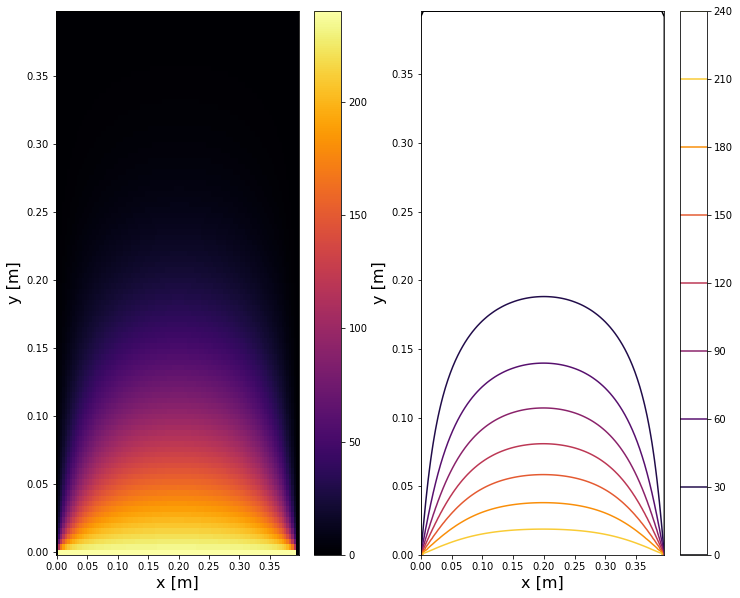

In [84]:
# Plotting

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,10))

plt1 = ax1.pcolor(X, Y, V_numer, cmap = 'inferno',shading='auto')
ax1.set_xlabel('x [m]', size = 16)  # Customised labels for axes
ax1.set_ylabel('y [m]', size = 16)
cbar = fig.colorbar(plt1, ax=ax1)

plt2 = ax2.contour(X, Y, V_numer, cmap='inferno')
ax2.set_xlabel('x [m]', size = 16)  # Customised labels for axes
ax2.set_ylabel('y [m]', size = 16)
cbar = fig.colorbar(plt2, ax=ax2)